In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


In [4]:
df =  pd.read_csv('Banking Dataset - Marketing Targets.csv',sep =";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.shape

(4521, 17)

In [7]:
df.std()

age           10.576211
balance     3009.638142
day            8.247667
duration     259.856633
campaign       3.109807
pdays        100.121124
previous       1.693562
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
Q1 = df.drop(['y'], axis=1).quantile(0.25)

Q3 = df.drop(['y'], axis=1).quantile(0.75)


IQR = Q3 - Q1

print(IQR)

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

age           16.0
balance     1411.0
day           12.0
duration     225.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [10]:
df.shape

(2803, 17)

In [11]:
df.std()

age           9.867949
balance     882.680979
day           8.336248
duration    146.238304
campaign      1.351701
pdays         0.000000
previous      0.000000
dtype: float64

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no


In [13]:
df.y.replace(('yes', 'no'), (1,0), inplace=True)

In [ ]:
df.default.replace(('yes', 'no'), (1,0), inplace=True)

In [22]:
df.loan.replace(('yes', 'no'), (1,0), inplace=True)

In [25]:
df.housing.replace(('yes', 'no'), (1,0), inplace=True)

In [30]:
map_marital = {'married': 0, 'single': 1, 'divorced': 2}
df['marital'] = df['marital'].replace(map_marital)

In [33]:
map_education = {'primary': 0, 'tertiary': 1, 'secondary': 2,'unknown':3}
df['education'] = df['education'].replace(map_education)

In [32]:
df.education.unique()

array(['primary', 'tertiary', 'secondary', 'unknown'], dtype=object)

In [34]:
df.drop(columns=['job', 'contact', 'month', 'pdays', 'previous','poutcome'], inplace=True)

### confusion matrix (heatmap)  roc-auc curve.

In [43]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
       
    cm = confusion_matrix(y_test, y_pred)
   
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                              index = ['Actual:0','Actual:1'])
  
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)
    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)
    plt.show()

In [44]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for bank ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)


In [45]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

# Model creation

In [35]:
ss = StandardScaler()
df_scaled = ss.fit_transform(df)
X = pd.DataFrame(df_scaled, columns=df.columns)
X.head()

,age,marital,education,default,balance,housing,loan,day,duration,campaign,y
0,-1.064403,-0.715227,-1.833005,-0.151633,1.302641,-1.128414,-0.447118,0.383438,-0.893108,-0.887507,-0.250095
1,-1.064403,-0.715227,-0.568755,-0.151633,0.950242,0.886200,2.236547,-1.536233,-0.072383,1.332316,-0.250095
2,1.874928,-0.715227,0.695495,-0.151633,-0.722234,0.886200,-0.447118,-1.296275,0.112280,-0.887507,-0.250095
3,-0.152197,-0.715227,0.695495,-0.151633,-0.555667,0.886200,-0.447118,-1.176295,-0.400673,-0.147566,-0.250095
4,0.050515,-0.715227,-0.568755,-0.151633,-0.471816,0.886200,-0.447118,-0.216460,-1.043574,-0.147566,-0.250095


In [36]:
X = df.drop(columns=['y'])
y = df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 2102
Testing size = 701


## Naive_bayes

In [37]:
seed = 404
np.random.seed(seed)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(gnb, X_train, y_train.values.ravel(), cv=kfold)
gnb_score = cv_score.mean()
print('Gaussian Naive Bayes K-fold Scores:')
print(cv_score)
print()
print('Gaussian Naive Bayes Average Score:')
print(gnb_score)
print()

Gaussian Naive Bayes K-fold Scores:
[0.93838863 0.91943128 0.91428571 0.91428571 0.90952381 0.91904762
 0.92380952 0.9        0.92380952 0.88571429]

Gaussian Naive Bayes Average Score:
0.9148296095689462



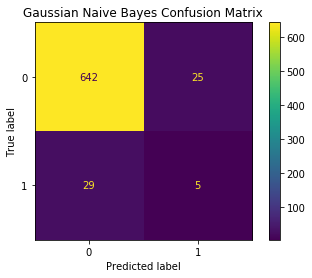

Gaussian Naive Bayes Model Accuracy (on testing set): 
0.9229671897289586


In [51]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

GNB = GaussianNB()
GNB_model = GNB.fit(X_train, y_train.values.ravel())
y_pred = GNB_model.predict(X_test)

disp = plot_confusion_matrix(GNB_model, X_test, y_test)
disp.ax_.set_title('Gaussian Naive Bayes Confusion Matrix')

plt.show()
print('Gaussian Naive Bayes Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

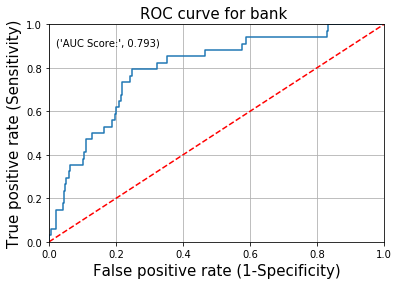

In [55]:
plot_roc(GNB_model)

In [54]:
test_report = get_test_report(GNB_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       667
           1       0.17      0.15      0.16        34

    accuracy                           0.92       701
   macro avg       0.56      0.55      0.56       701
weighted avg       0.92      0.92      0.92       701



### LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 10000)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(lr, X_train, y_train.values.ravel(), cv=kfold)
lr_score = cv_score.mean()
print('Logistic Regression K-fold Scores (training):')
print(cv_score)
print()
print('Logistic Regression Average Score:')
print(lr_score)

Logistic Regression K-fold Scores (training):
[0.93364929 0.92890995 0.93809524 0.93809524 0.94285714 0.93809524
 0.93809524 0.93809524 0.93333333 0.94285714]

Logistic Regression Average Score:
0.9372083051229971


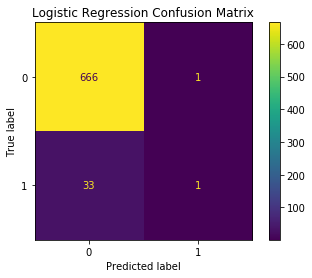

Logistic Regression Model Accuracy (on testing set): 
0.9514978601997147


In [56]:
lr = LogisticRegression(max_iter = 10000)
lr_model = lr.fit(X_train, y_train.values.ravel())
y_pred = lr_model.predict(X_test)

disp = plot_confusion_matrix(lr_model, X_test, y_test)
disp.ax_.set_title('Logistic Regression Confusion Matrix')

plt.show()
print('Logistic Regression Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

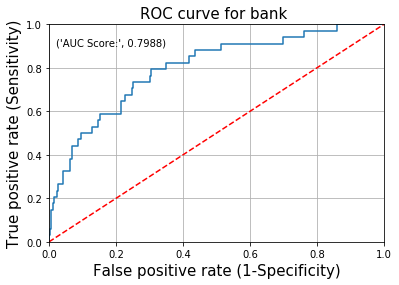

In [57]:
plot_roc(lr_model)

In [58]:
test_report = get_test_report(lr_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       667
           1       0.50      0.03      0.06        34

    accuracy                           0.95       701
   macro avg       0.73      0.51      0.52       701
weighted avg       0.93      0.95      0.93       701



### DECISION TREE

In [39]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state = 1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(dt, X_train, y_train.values.ravel(), cv=kfold)
dt_score = cv_score.mean()
print('Decision Tree K-fold Scores:')
print(cv_score)
print()
print('Decision Tree Average Score:')
print(dt_score)

Decision Tree K-fold Scores:
[0.90047393 0.88151659 0.91428571 0.88571429 0.9047619  0.8952381
 0.9047619  0.89047619 0.89047619 0.9       ]

Decision Tree Average Score:
0.8967704807041299


In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv_score = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10)
knn_score = cv_score.mean()
print('KNN K-fold Scores):')
print(cv_score)
print()
print('KNN Average Score:')
print(knn_score)

KNN K-fold Scores):
[0.91943128 0.92417062 0.93809524 0.93333333 0.93333333 0.92857143
 0.92857143 0.92857143 0.93809524 0.93333333]

KNN Average Score:
0.930550665763936


## Best performing models


In [41]:
scores = [['Gaussian Naive Bayes', gnb_score],
 ['Logistic Regression', lr_score],
 ['Decision Tree', dt_score],
 ['K-Nearest Neighbor', knn_score]]
 

df_scores = pd.DataFrame(scores,
                         columns = ['Model', 'Score Average']
                        )
df_scores

,Model,Score Average
0,Gaussian Naive Bayes,0.914830
1,Logistic Regression,0.937208
2,Decision Tree,0.896770
3,K-Nearest Neighbor,0.930551
